In [124]:
%matplotlib inline

import os
import numpy as np
import pandas as pd

from ram import config

import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.run_aggregator import RunAggregator
from ram.analysis.combo_search import CombinationSearch

In [237]:
print(RunManager.get_run_names('LongPeadStrategy'))

         Run                                        Description
0   run_0018                               sector 30 new params
1   run_0020                       sector 30 with aasims params
2   run_0021  Sector 30, lowered price to 5, though no filte...
3   run_0022                     test run with predictive model
4   run_0023                            test run with more data
5   run_0024                         more data updated features
6   run_0025     same as run 0024 but with ExtraTressClassifier
7   run_0026          same as above but with LogisticRegression
8   run_0027  Voting with Logistic Classifier, Random Forest...
9   run_0028                                    AAdaBoost model
10  run_0029                                           AdaBoost
11  run_0030                                           adaboost
12  run_0031  bagging for logistic, voting method same as ru...
13  run_0036                                              ridge
14  run_0037                        remo

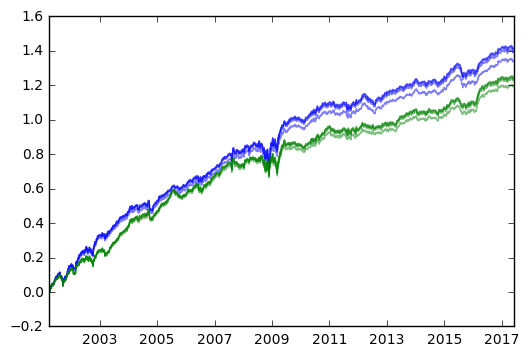

In [238]:
plt.figure()

runs = ['run_0018', 'run_0024']
runs = ['run_0024', 'run_0025']
runs = ['run_0031', 'run_0036']

runs = ['run_0024', 'run_0036']
runs = ['run_0036', 'run_0038']
runs = ['run_0038', 'run_0040']

colors = ['b', 'g']

for c, run in zip(colors, runs):
    rm1 = RunManager('LongPeadStrategy', run, 2000)
    rm1.import_return_frame()
    plt.plot(rm1.returns.cumsum(), c, alpha=.5)

plt.show()

In [219]:
rm1 = RunManager('LongPeadStrategy', 'run_0038', 2010)
rm1.import_return_frame()

In [222]:
rm1.returns.mean() * 252 / rm1.returns.std() / np.sqrt(252)

0    1.209670
1    1.206876
2    1.198775
3    1.171698
dtype: float64

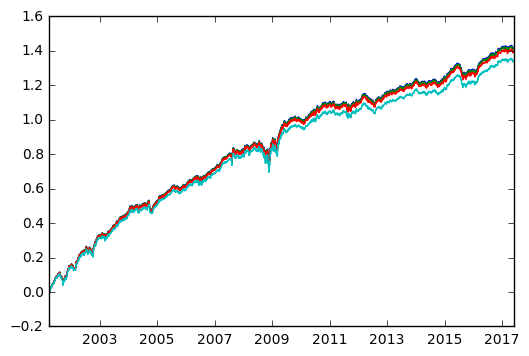

In [233]:
rm1 = RunManager('LongPeadStrategy', 'run_0038', 2000)
rm1.import_return_frame()

plt.figure()
plt.plot(rm1.returns.cumsum())

In [228]:
df = rm1.returns.iloc[:, [0]].reset_index()
df.columns = ['Date', 'Return']
df['TIndex'] = ['{}{}'.format(x.year, (x.month-1)/3+1) for x in df.Date]
df['Year'] = [x.year for x in df.Date]


In [231]:
df.groupby('Year')['Return'].sum()

Year
2010    0.096303
2011    0.005804
2012    0.052208
2013    0.074353
2014    0.018710
2015    0.036493
2016    0.130703
2017   -0.004113
Name: Return, dtype: float64